## **Applying analytical techniques over the Big Data and Visualizing it.**

In our ongoing big data analysis project, we're focused on refining data insights with **Matplotlib**. Our primary dataset is the Iris dataset, and our mission is to explore more advanced analysis techniques, employing scikit-learn's **K-Nearest Neighbors (KNN)** and **Decision Tree classifier** models as valuable tools.

Additionally, we've harnessed **Seaborn** for data visualization. Our ultimate goal is to create insightful visualizations that effectively convey our analysis results. This project signifies the next step in our data exploration journey, with the Iris dataset at its core, and Matplotlib, scikit-learn, and Seaborn as essential tools to bring our findings to life.

Now, let's dive into the analysis conducted on the Iris dataset.

### **Import necessary modules**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
  accuracy_score, classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["species"] = iris.target_names[iris.target]
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### **Load the Iris dataset for ML training**

In [2]:
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### **Analysis using DecisionTreeClassifier model**

The DecisionTreeClassifier model plays a pivotal role in this process, enabling us to navigate and classify data with precision. This model allows us to harness the potential of decision trees, offering a structured approach to unveil insights within the Iris dataset. Now, let's delve into the details of our analysis to discover the valuable patterns and information that have emerged.

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



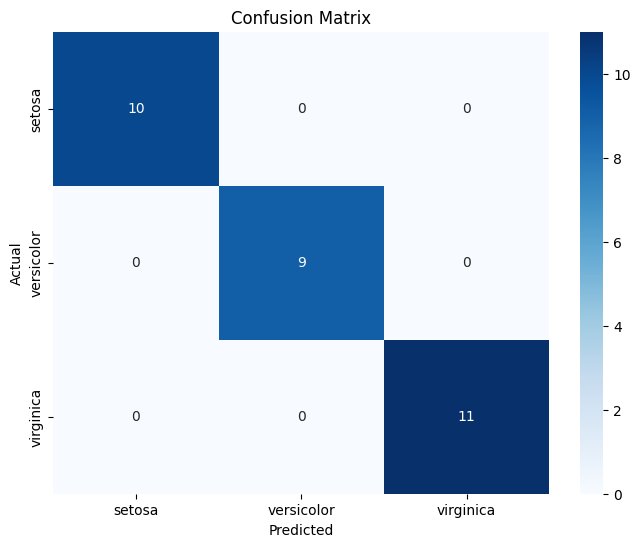

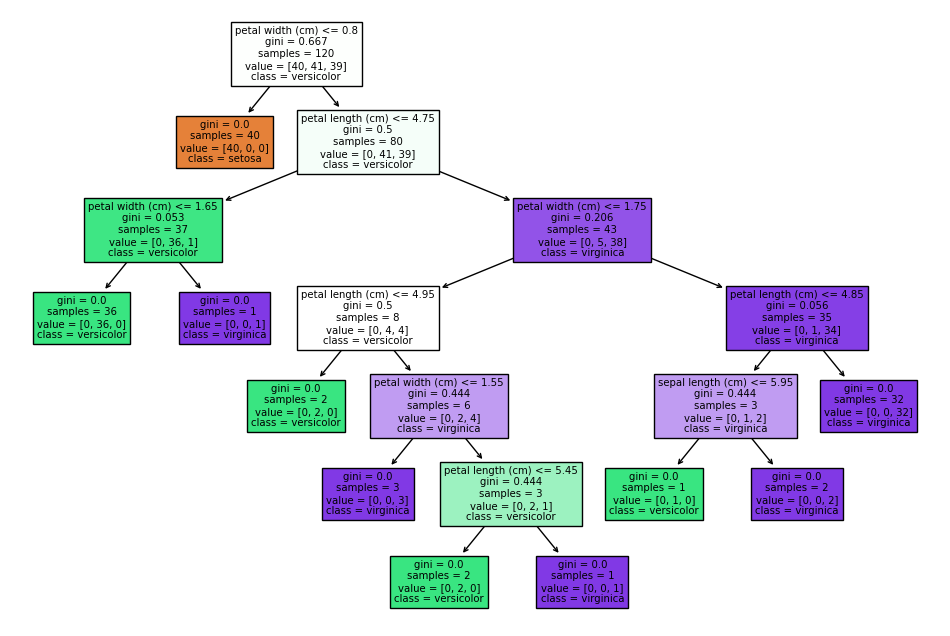

In [3]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

classification_rep = classification_report(
    y_test, y_pred, target_names=iris.target_names
)
print("Classification Report:\n", classification_rep)

confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=iris.target_names,
    yticklabels=iris.target_names,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(
    clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True
)
plt.show()

Here, we can visualize the relation between each of the attributes in the dataset via this tree diagram, generated by Decision Tree Classifier model.

### **Analysis using K-Nearest Neighbour Classifier model**

Here, we use K-nearest Neighbour (KNN) model to initiate a comprehensive exploration of our dataset. KNN relies on proximity for classification, guiding our analysis and helping unveil unique insights within the Iris dataset. Now, let's delve into the analysis details to reveal the patterns and insights that have emerged.

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



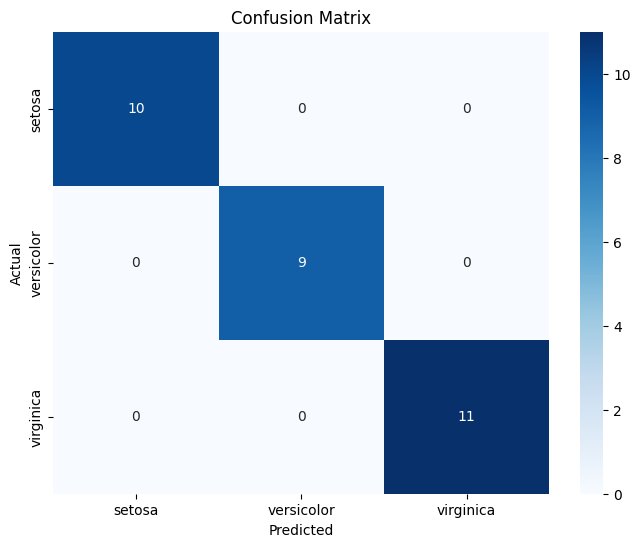

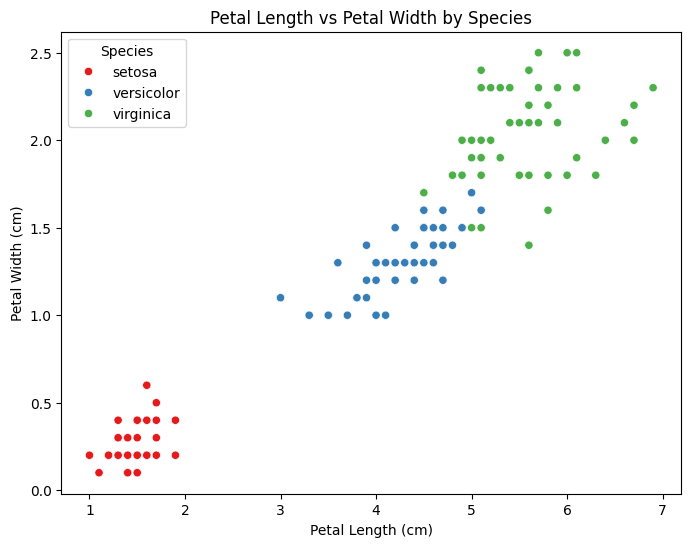

In [4]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

classification_rep = classification_report(
    y_test, y_pred, target_names=iris.target_names
)
print("Classification Report:\n", classification_rep)

confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=iris.target_names,
    yticklabels=iris.target_names,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="petal length (cm)",
    y="petal width (cm)",
    data=iris_df,
    hue=iris_df["species"],
    palette="Set1",
)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Petal Length vs Petal Width by Species")
plt.legend(title="Species", loc="upper left")
plt.show()

Here, the confusion matrix is employed after training a model to provide a comprehensive evaluation of its performance. It allows us to assess how well the model classifies instances into different categories, revealing crucial information about true positives, true negatives, false positives, and false negatives. This matrix acts as a valuable tool in quantifying the model's accuracy, precision, recall, and F1 score, offering a holistic view of its strengths and weaknesses. By examining the confusion matrix, we gain a deeper understanding of how our KNN and Decision Tree classifier models are performing on the Iris dataset, enabling us to fine-tune and optimize our analysis.

### **Finding relation between Sepal length, Sepal width by Species**

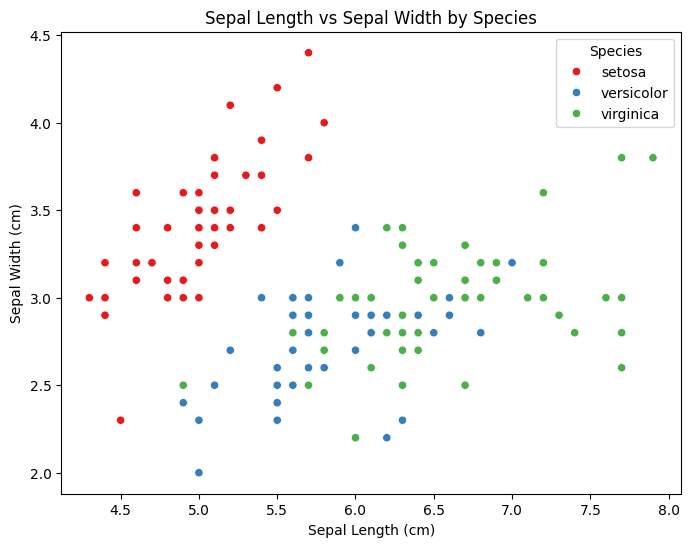

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="sepal length (cm)",
    y="sepal width (cm)",
    hue="species",
    data=iris_df,
    palette="Set1",
)

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Sepal Length vs Sepal Width by Species")

plt.legend(title="Species", loc="upper right")
plt.show()

From the above scatter plot, we can conclude that:
- The relation between sepal width is inversely proportional to sepal length.
- ***Setosa*** behaving like a outlier, has the largest sepal width, and smallest sepal length among other species.
- ***Versicolor*** and ***Virginica*** are sharing common personalities, mixing among each other.
- ***Virginica*** has the largest sepal length among all the other species

### **Finding relation between Petal length, Petal width by Species**

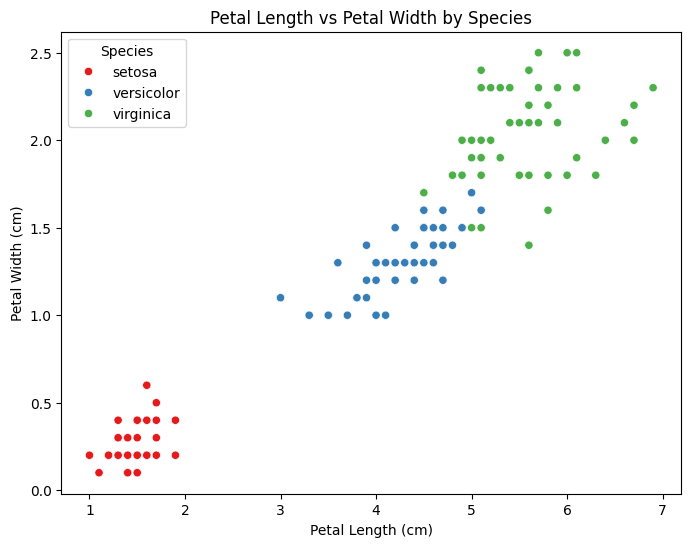

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="petal length (cm)",
    y="petal width (cm)",
    hue="species",
    data=iris_df,
    palette="Set1",
)

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Petal Length vs Petal Width by Species")

plt.legend(title="Species", loc="upper left")
plt.show()

From the above scatter plot, we can conclude that:
- The relation between petal length and petal width is directly proportional to each other.
- ***Setosa*** has the smallest petals in size. It has the smallest petal width and petal length.
- ***Virginica*** has the largest petals among other species. It has the largest petal length and petal width.
- ***Versicolor*** lies between the other 2 extreme ends.

### **Conclusion**

Therefore, We've successfully analyzed the Iris dataset using Decision Tree Classifier and K-Nearest Neighbors (KNN) techniques. Through these methods, we've unveiled intricate patterns and valuable insights within the dataset. Our analysis not only deepened our understanding of the Iris dataset but also emphasized the effectiveness of these classification approaches.

As we continue our data exploration journey, we remain committed to leveraging these techniques to tackle more diverse datasets, bringing us closer to our data analysis objectives. Our exploration of the Iris dataset with Decision Tree Classifier and KNN marks a significant step in our ongoing quest for data-driven insights.